#### Assignment 9 : Data Analytics 2

#### 9.1 Implement logistic regression using Python/R to perform classification on Social_Network_Ads.csv dataset.
#### 9.2 Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset

#### Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Social_Network_Ads.csv");
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
# Encoding categorial feature 'Gender' to numerical
df.loc[ df["Gender"] == "Male", "Gender" ] = 0
df.loc[ df["Gender"] == "Female", "Gender" ] = 1
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [6]:
df.drop(["User ID"], axis=1, inplace=True)

In [7]:
def min_max_normalize(feature):
    df[feature] = (df[feature] - df[feature].min() ) / ( df[feature].max() - df[feature].min() )

min_max_normalize("Age")
min_max_normalize("EstimatedSalary")
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,0.023810,0.029630,0
1,0,0.404762,0.037037,0
2,1,0.190476,0.207407,0
3,1,0.214286,0.311111,0
4,0,0.023810,0.451852,0


In [8]:
df.Purchased.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

#### Implementing Logistic Regression using Python to perform classification:

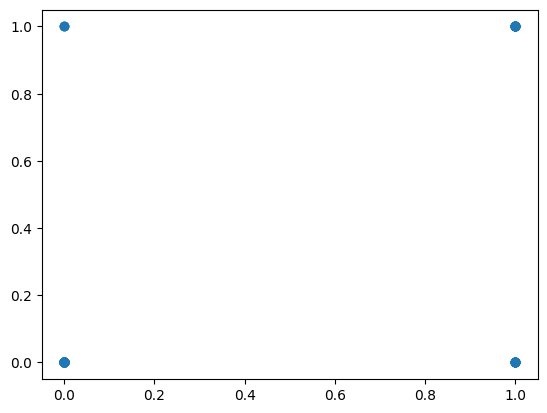

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = np.asarray(df.drop(["Purchased"], axis = 1))
y = np.asarray(df["Purchased"])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

model = LogisticRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

plt.scatter(y_test,y_pred)

#### Only two points visible because our training data has only 2 values : 0 or 1. We will use confusion matrix instead of scatter plot

#### 9.2 Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset

In [10]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
cm = confusion_matrix(y_test,y_pred)
print("confusion Matrix : \n ", cm) # confusion matrix is a table to evaluate classification problem

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy : \n", accuracy)

TN,FN,FP,TP = cm.ravel()
print(f"TN - {TN}, FN - {FN}, FP - {FP}, TP - {TP} ")

error_rate = 1 - accuracy;
print("Error rate : \n", error_rate)

precision = precision_score(y_test,y_pred)
print("Precision Score : \n", precision)

recall = recall_score(y_test,y_pred)
print("Recall Score : \n", recall)

confusion Matrix : 
  [[72  3]
 [20 25]]
Accuracy : 
 0.8083333333333333
TN - 72, FN - 3, FP - 20, TP - 25 
Error rate : 
 0.19166666666666665
Precision Score : 
 0.8928571428571429
Recall Score : 
 0.5555555555555556


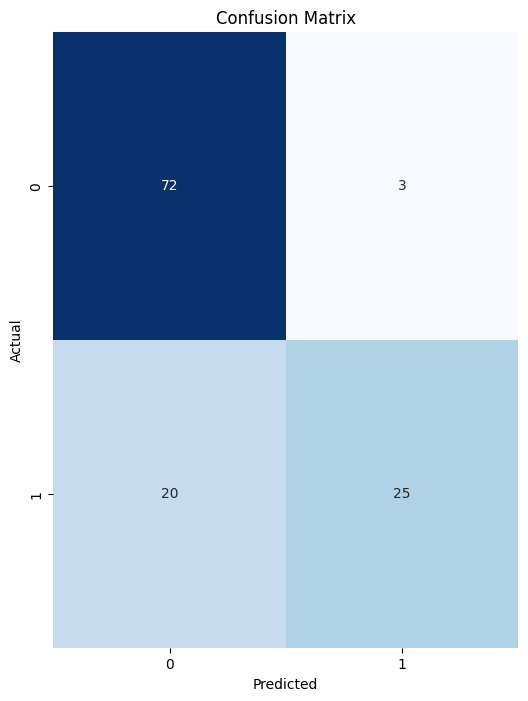

In [11]:
plt.figure(figsize = (6,8))
sns.heatmap(cm,annot = True,cmap = 'Blues', cbar = False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()